# Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Create UserGenerator instance

In [2]:
from synabon.users import UserGenerator

In [3]:
n_users = 1000
n_interactions = 10
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [4]:
ug = UserGenerator(n_users, n_interactions)

In [5]:
from functools import partial
scale = 1_000
balance_generator = partial(np.random.exponential, scale=scale)

In [6]:
df = ug.get_data(balance_generator, start_dt, end_dt)

In [7]:
df.head(10)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,date
0,becc0139-4977-4378-9591-ce88a5c4a762,617.742885,NaN,registration,NaN,2023-01-01
5973,1f800d3c-7206-43d3-a6c7-9e49d68cea2c,1179.147632,NaN,registration,NaN,2023-01-01
1177,fc2ae3d8-08f4-4dbb-a3c5-6d837554c154,835.629024,NaN,registration,NaN,2023-01-01
4543,55307ba0-c899-4351-8ef1-f80c9b73c040,1349.349329,NaN,registration,NaN,2023-01-01
2783,d61d23e3-1ef4-4a76-90b9-93b0d4184cd7,38.486997,NaN,registration,NaN,2023-01-01
8404,866b7eef-f884-4a93-8489-6dec2bd7869c,2718.775595,NaN,registration,NaN,2023-01-01
5379,9142c49d-930e-468d-bbce-ceaeae53694e,59.449114,NaN,registration,NaN,2023-01-01
1166,39c606ab-a671-4258-a660-d3ff1b3687b8,1498.431940,NaN,registration,NaN,2023-01-01
10109,3a8062ff-f08d-4118-a3d0-4206fd954045,142.734481,NaN,registration,NaN,2023-01-01
8415,ea554be9-d6da-4d7d-b45f-e898b48fbf53,2424.338621,NaN,registration,NaN,2023-01-01


In [8]:
df.shape

(11000, 6)

In [9]:
df["user_id"].nunique()

1000

# Let's see the distribution of balances at the start

In [10]:
mask = df["interaction_type"] == "registration"
df_start = df[mask]
df_start.shape

(1000, 6)

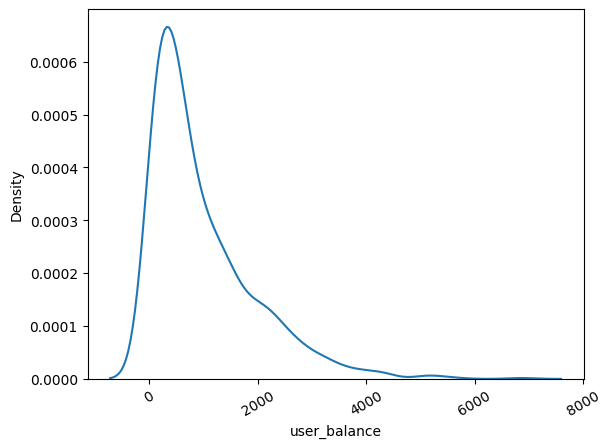

In [11]:
g = sns.kdeplot(x="user_balance", data=df_start)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's see how the balances of some users changed

In [12]:
user_ids = np.random.choice(df["user_id"].unique(), size=3)
mask = (df["user_id"].isin(user_ids))
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,date
10813,a97783d3-68a9-428a-9b2c-29295b7c165f,524.334512,NaN,registration,NaN,2023-01-01 00:00:00
1122,fb7e5117-d201-44be-9acb-e61811b07bf5,176.774602,NaN,registration,NaN,2023-01-01 00:00:00
5687,80db2d24-0273-43e4-b1aa-61a5ab0b2b00,2721.148666,NaN,registration,NaN,2023-01-01 00:00:00
10814,a97783d3-68a9-428a-9b2c-29295b7c165f,718.848682,194.514170,transaction,0.583543,2023-01-03 14:45:29
5688,80db2d24-0273-43e4-b1aa-61a5ab0b2b00,946.455891,-1774.692775,transaction,5.324078,2023-01-04 16:26:39


In [13]:
user_df.shape

(33, 6)

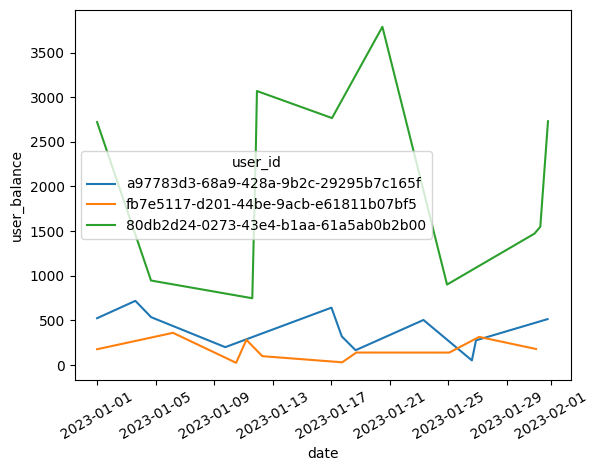

In [14]:
g = sns.lineplot(x="date", y="user_balance", hue="user_id", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of balances at the end

In [15]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [16]:
df_last.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,date
7974,f786aa7e-1f3e-4d35-b5ed-3a97be32c9f8,2931.790385,719.031958,transaction,2.157096,2023-01-18 09:00:54
6247,af97c9c8-242b-4b33-8228-3dc800014678,1795.066964,-491.324132,transaction,1.473972,2023-01-18 20:31:56
1440,beadcea9-ed53-4fb0-8e6d-56868f390abb,3076.321526,-4902.255986,transaction,14.706768,2023-01-19 02:53:34
8744,326bd3fc-6632-45f4-8bff-d06390f71ea9,669.118754,-354.929679,transaction,1.064789,2023-01-19 06:28:26
3343,34135a2f-5ae2-4845-84f0-917cf6958348,473.200558,52.495500,transaction,0.157487,2023-01-19 11:50:26


In [17]:
df_last.shape

(1000, 6)

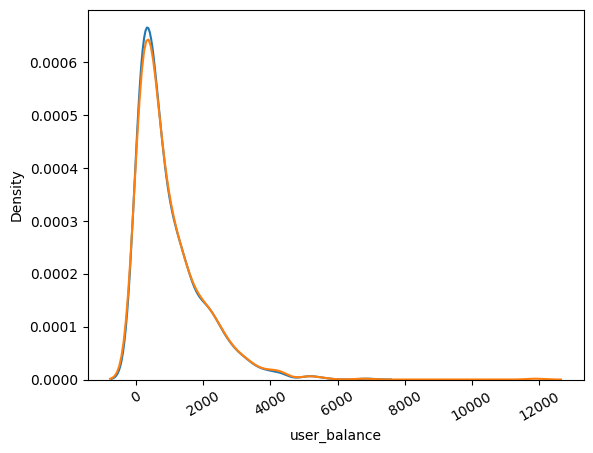

In [18]:
g = sns.kdeplot(x="user_balance", data=df_start)
g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [19]:
print(f"MEAN Before: {np.mean(df_start['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 979.6020531758401
MEAN After: 1002.286574460611


In [20]:
df_start[df_start['user_balance'] < 0]["user_id"].count()

0

In [21]:
df_last[df_last['user_balance'] < 0]["user_id"].count()

0